In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv(r"C:\Users\user\Desktop\guvi pro\airline_review_NLP\Airline_Reviews.csv")
data.head(5)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [20]:
check_bal = data["Recommended"].value_counts()
check_bal

Recommended
no     15364
yes     7807
Name: count, dtype: int64

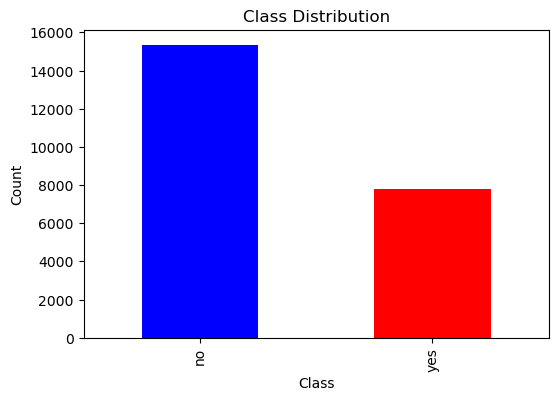

In [19]:
plt.figure(figsize=(6,4))
check_bal.plot(kind='bar' , color=["blue","red"])
plt.title('Class Distribution')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

In [25]:
data["Overall_Rating"].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
n      842
5      830
6      676
Name: count, dtype: int64

In [27]:
# Replace 'n' with 0 in the 'Overall_Rating' column
data['Overall_Rating'] = data['Overall_Rating'].replace('n', '0').astype(int)



In [28]:
data["Overall_Rating"].value_counts()

Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1192
4      859
0      842
5      830
6      676
Name: count, dtype: int64

In [31]:
#Now let's convert this columns into only 4 different values
data['New_Ratings'] = pd.cut(data['Overall_Rating'], 4, labels = [1,2,3,4])
data['New_Ratings'].unique()

[4, 1, 2, 3]
Categories (4, int64): [1 < 2 < 3 < 4]

In [35]:
data.tail(4)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,...,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,New_Ratings
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,NaN,Solo Leisure,Economy Class,...,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no,1
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,NaN,Business,Economy Class,...,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no,2
23169,23169,ZIPAIR,6,"""It was immaculately clean""",23rd May 2022,True,Zipair is JAL’s budget airline. They don’t ha...,Dreamliner,Business,Business Class,...,May 2022,3.0,4.0,3.0,1.0,2.0,5.0,5.0,yes,3
23170,23170,ZIPAIR,1,"""lost all of our money with no refund""",20th May 2022,True,They lied about connection in Narita and we ...,NaN,Solo Leisure,Economy Class,...,May 2022,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,1


In [36]:
#Now let's get rid of some unuseful columns
data = data.drop(['Unnamed: 0','Overall_Rating'], axis=1)

In [37]:
data.columns

Index(['Airline Name', 'Review_Title', 'Review Date', 'Verified', 'Review',
       'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity',
       'Value For Money', 'Recommended', 'New_Ratings'],
      dtype='object')

In [39]:
data['Verified'].value_counts()

Verified
True     12322
False    10849
Name: count, dtype: int64